In [1]:
import tensorflow as tf
import matplotlib
from matplotlib import pyplot as plt
from skimage import io        # Package to simply read images

In [18]:
image = io.imread("bird.png")

Image shape: (680, 608)


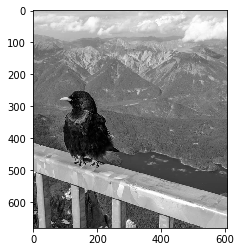

In [19]:
print("Image shape: {}".format(image.shape))
plt.imshow(image, cmap=plt.cm.gray)

In [20]:
image = tf.convert_to_tensor(image, tf.float32, name="input_image")

In [21]:
image

<tf.Tensor: id=12, shape=(680, 608), dtype=float32, numpy=
array([[192., 192., 192., ..., 200., 200., 200.],
       [190., 190., 190., ..., 200., 200., 200.],
       [189., 189., 189., ..., 200., 200., 200.],
       ...,
       [ 47.,  43.,  43., ..., 184., 184., 184.],
       [ 29.,  31.,  53., ..., 184., 184., 183.],
       [ 19.,  20.,  50., ..., 185., 185., 184.]], dtype=float32)>

As most of the Tensorflow operations are meant for batched images, i.e., of shape $(B, H, W, D)$ we will synthetically expand the dimensions of our image, to turn it into a batch of one single image:

In [22]:
image = tf.expand_dims(image, axis=0) # we expand our tensor, adding a dimension at position 0

In [23]:
image

<tf.Tensor: id=14, shape=(1, 680, 608), dtype=float32, numpy=
array([[[192., 192., 192., ..., 200., 200., 200.],
        [190., 190., 190., ..., 200., 200., 200.],
        [189., 189., 189., ..., 200., 200., 200.],
        ...,
        [ 47.,  43.,  43., ..., 184., 184., 184.],
        [ 29.,  31.,  53., ..., 184., 184., 183.],
        [ 19.,  20.,  50., ..., 185., 185., 184.]]], dtype=float32)>

In [24]:
image = tf.expand_dims(image, axis=-1) # we expand our tensor, adding a dimension at position 0
print("Tensor shape: {}".format(image.shape))

Tensor shape: (1, 680, 608, 1)


## Convolution

In [13]:
kernel = tf.constant([[1 / 16, 2 / 16, 1 / 16],
                      [2 / 16, 4 / 16, 2 / 16],
                      [1 / 16, 2 / 16, 1 / 16]], tf.float32, name="gaussian_kernel")

In [14]:
kernel.shape

TensorShape([3, 3])

In [16]:
kernel = tf.expand_dims(tf.expand_dims(kernel, axis=-1), axis=-1)
kernel

<tf.Tensor: id=11, shape=(3, 3, 1, 1), dtype=float32, numpy=
array([[[[0.0625]],

        [[0.125 ]],

        [[0.0625]]],


       [[[0.125 ]],

        [[0.25  ]],

        [[0.125 ]]],


       [[[0.0625]],

        [[0.125 ]],

        [[0.0625]]]], dtype=float32)>

In [25]:
blurred_image = tf.nn.conv2d(image, kernel, strides=[1, 1, 1, 1], padding="SAME")

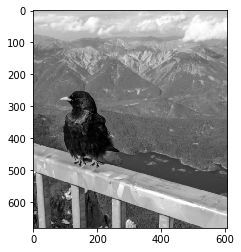

In [26]:
blurred_res = blurred_image.numpy()
# We "unbatch" our result by selecting the first (and only) image; we also remove the depth dimension:
blurred_res = blurred_res[0, ..., 0]

plt.imshow(blurred_res, cmap=plt.cm.gray)

## Contour detection filter application

In [58]:
kernel = tf.constant([[-1, -1, -1],
                      [-1,  8, -1],
                      [-1, -1, -1]], tf.float32, name="edge_kernel")
kernel = tf.expand_dims(tf.expand_dims(kernel, axis=-1), axis=-1)

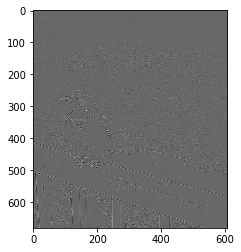

In [59]:
edge_image = tf.nn.conv2d(image, kernel, strides=[1, 1, 1, 1], padding="SAME")
edge_res = edge_image.numpy()[0, ..., 0]
plt.imshow(edge_res, cmap=plt.cm.gray)

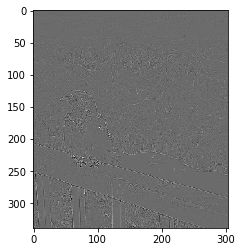

In [60]:
edge_image = tf.nn.conv2d(image, kernel, strides=[1, 2, 2, 1], padding="VALID")
edge_res = edge_image.numpy()[0, ..., 0]
plt.imshow(edge_res, cmap=plt.cm.gray)

# Pooling

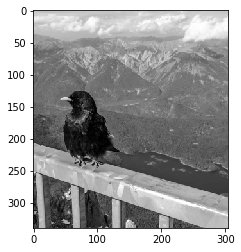

In [61]:
avg_pooled_image = tf.nn.avg_pool(image, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")
avg_res = avg_pooled_image.numpy()[0, ..., 0]
plt.imshow(avg_res, cmap=plt.cm.gray)

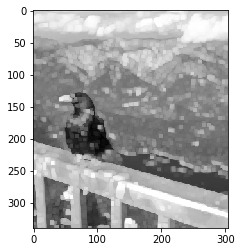

In [62]:
max_pooled_image = tf.nn.max_pool(image, ksize=[1, 10, 10, 1], strides=[1, 2, 2, 1], padding="SAME")
max_res = max_pooled_image.numpy()[0, ..., 0]
plt.imshow(max_res, cmap=plt.cm.gray)